In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceBgeEmbeddings
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Modelo: sentence-transformers/paraphrase-MiniLM-L6-v2

In [2]:
from langchain.embeddings import HuggingFaceBgeEmbeddings
model_name = "intfloat/e5-small-v2"
model_kwargs = {"device": "cpu"}
encode_kwargs={"normalize_embeddings": True, "batch_size": 32}

emb = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)


C:\Users\emolt\AppData\Local\Temp\ipykernel_14724\1958049103.py:6: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  emb = HuggingFaceBgeEmbeddings(


## EXPERIMENTO 7

In [3]:
vectorstore_7_txt = FAISS.load_local("faiss_index_proyectos_9_txt", embeddings=emb, 
                                 allow_dangerous_deserialization=True)

In [4]:
print(vectorstore_7_txt)

In [5]:
documents = list(vectorstore_7_txt.docstore._dict.values())

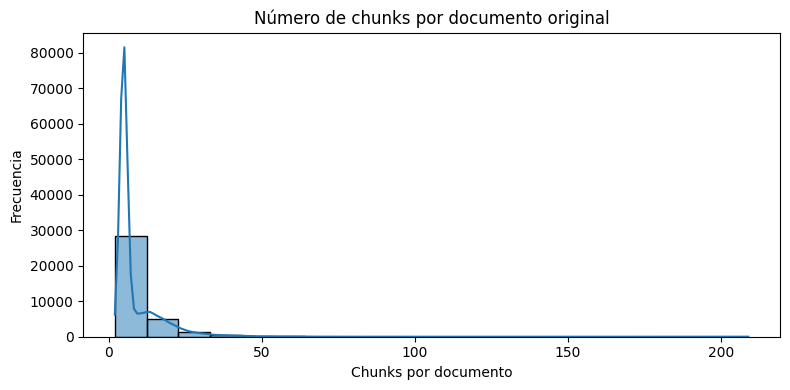

In [6]:
counts = Counter([doc.metadata.get('source', 'unknown') for doc in documents])
values = list(counts.values())
plt.figure(figsize=(8,4))
sns.histplot(values, bins=20, kde=True)
plt.title("Número de chunks por documento original")
plt.xlabel("Chunks por documento")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

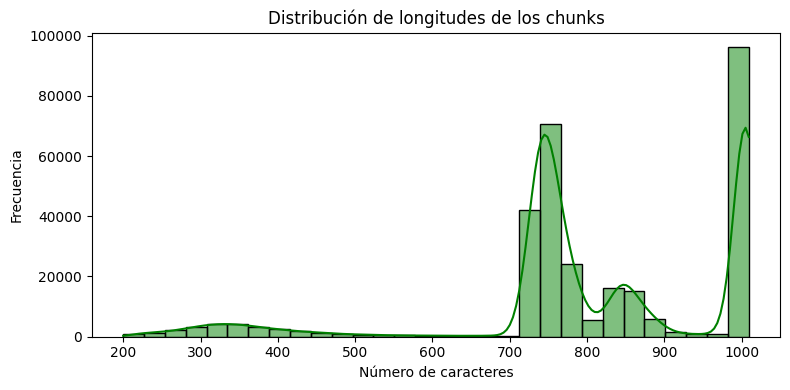

In [7]:
lengths = [len(doc.page_content) for doc in documents]
plt.figure(figsize=(8,4))
sns.histplot(lengths, bins=30, kde=True, color="green")
plt.title("Distribución de longitudes de los chunks")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

In [8]:
embeddings = vectorstore_7_txt.index.reconstruct_n(0, vectorstore_7_txt.index.ntotal)
metadata = [doc.metadata for doc in vectorstore_7_txt.docstore._dict.values()]

In [9]:
print(metadata)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



C:\Users\emolt\anaconda3\envs\py310real\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


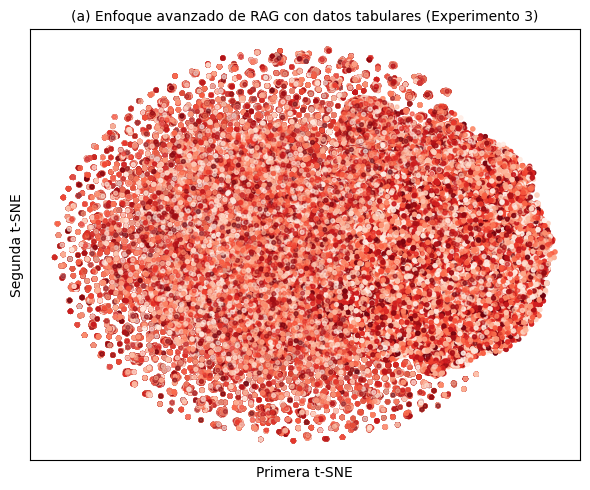

In [10]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

color_key = "source"
titulo = "(a) Enfoque avanzado de RAG con datos tabulares (Experimento 3)"
cmap_color = "Reds"
output_name = "tsne_experimento_9.png"

reducer = TSNE(n_components=2, perplexity=30, init="pca", random_state=42)
reduced = reducer.fit_transform(embeddings)

labels = [meta.get(color_key, "unknown") for meta in metadata]
unique_labels = list(set(labels))
label_to_color = {label: i for i, label in enumerate(unique_labels)}
colors = [label_to_color[label] for label in labels]

plt.figure(figsize=(6, 5))
plt.scatter(reduced[:, 0], reduced[:, 1], c=colors, cmap=cmap_color, alpha=0.6, s=8)
plt.title(titulo, fontsize=10)
plt.xlabel("Primera t-SNE")
plt.ylabel("Segunda t-SNE")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(output_name, dpi=300)
plt.show()


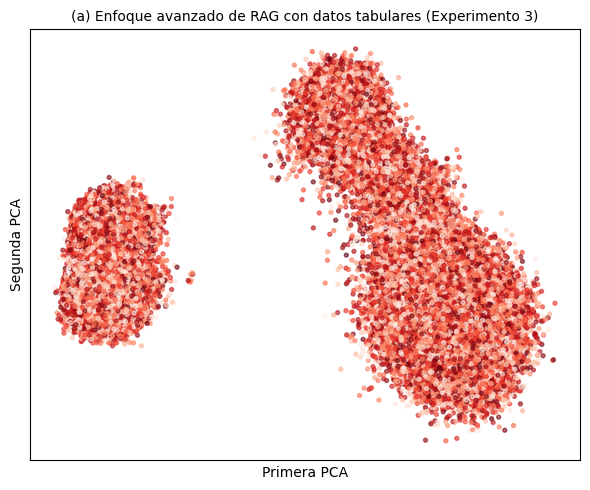

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

color_key = "source"
titulo = "(a) Enfoque avanzado de RAG con datos tabulares (Experimento 3)"
cmap_color = "Reds"
output_name = "pca_experimento_9.png"

reducer = PCA(n_components=2)
reduced = reducer.fit_transform(embeddings)

labels = [meta.get(color_key, "unknown") for meta in metadata]
unique_labels = list(set(labels))
label_to_color = {label: i for i, label in enumerate(unique_labels)}
colors = [label_to_color[label] for label in labels]

plt.figure(figsize=(6, 5))
plt.scatter(reduced[:, 0], reduced[:, 1], c=colors, cmap=cmap_color, alpha=0.6, s=8)
plt.title(titulo, fontsize=10)
plt.xlabel("Primera PCA")
plt.ylabel("Segunda PCA")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(output_name, dpi=300)
plt.show()